In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import random

import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping

### Cifar10

In [51]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [52]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [53]:
#shuffle the data

shuffle_order = np.random.permutation(x_train.shape[0])

x_train = x_train[shuffle_order,:]
y_train = y_train[shuffle_order]

# make float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize to (0-1)
x_train /= 255
x_test /= 255

x_train.shape

(50000, 32, 32, 3)

In [54]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
print(y_train.shape)
print(y_train[:10])

(50000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


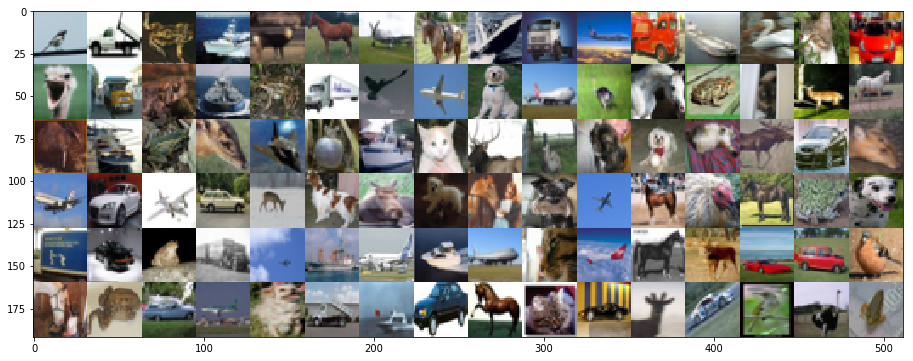

In [55]:
samples = np.concatenate(
    [np.concatenate(
        [x_train[i].reshape((32,32,3)) for i in [int(random.random() * len(x_train)) for i in range(16)]], axis=1) 
     for i in range(6)], axis=0)
plt.figure(figsize=(16,6))
plt.imshow(samples, cmap='gray')

In [37]:
target_string =  np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

### VGG16

In [58]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [39]:
num_classes = 10
inp = vgg.input
new_classification_layer = Dense(num_classes, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model = Model(inp,out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [40]:
for l, layer in enumerate(model.layers[0:-1]):
    layer.trainable = False

for l, layer in enumerate(model.layers[-1:]):
    layer.trainable = True
    
model.layers

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
es = EarlyStopping(monitor='val_acc', patience=6)
model.fit(x_train, y_train,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[es])

ValueError: Error when checking input: expected input_3 to have shape (224, 224, 3) but got array with shape (32, 32, 3)